In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)ff

In [2]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month']=pd.to_datetime(df['Month'])
df.tail()

,Month,Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [5]:
df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


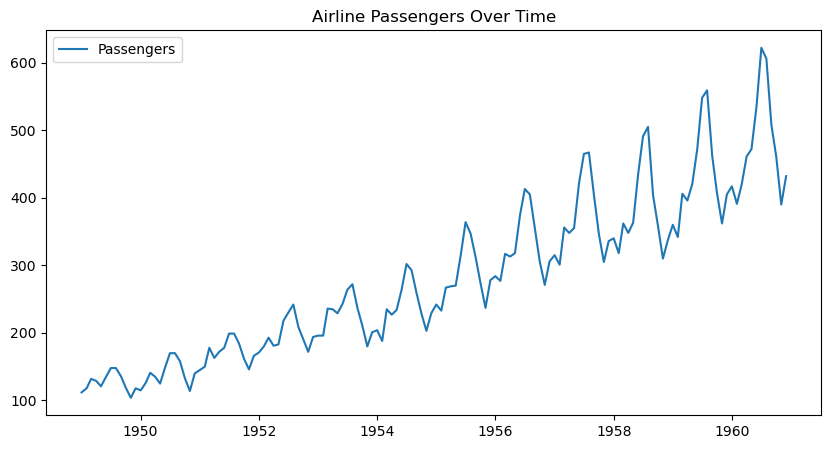

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df,label='Passengers')
plt.title('Airline Passengers Over Time')
plt.legend()
plt.show()

In [7]:
train=df.iloc[:12]
test=df.iloc[12:]

In [8]:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit(disp=False)

C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate

In [18]:
# 4. Forecast for test period
forecast = model_fit.get_forecast(steps=len(test))
y_pred = forecast.predicted_mean
y_true = test['Passengers']

In [19]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("SARIMA RMSE:", rmse)

SARIMA RMSE: 227.02870263629856


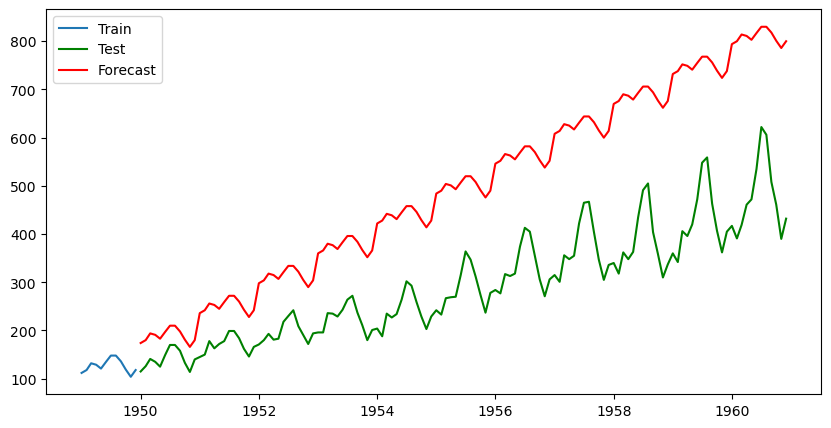

In [21]:
# 6. Plot results
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Passengers'], label="Train")
plt.plot(test.index, test['Passengers'], label="Test", color="green")
plt.plot(test.index, y_pred, label="Forecast", color="red")
plt.legend()
plt.show()